In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
xt0 = pd.read_parquet('X_t0.parquet')
xt1 = pd.read_parquet('X_t1.parquet')
xt2 = pd.read_parquet('X_t2.parquet')
xt3 = pd.read_parquet('X_t3.parquet')

assert xt0.columns.equals(xt1.columns)
assert xt0.columns.equals(xt2.columns)
assert xt0.columns.equals(xt3.columns)

In [3]:
for col in xt0.columns:
    print(col)

borrow_block_number
borrow_timestamp
wallet_address
first_tx_timestamp
last_tx_timestamp
wallet_age
incoming_tx_count
outgoing_tx_count
net_incoming_tx_count
total_gas_paid_eth
avg_gas_paid_per_tx_eth
risky_tx_count
risky_unique_contract_count
risky_first_tx_timestamp
risky_last_tx_timestamp
risky_first_last_tx_timestamp_diff
risky_sum_outgoing_amount_eth
outgoing_tx_sum_eth
incoming_tx_sum_eth
outgoing_tx_avg_eth
incoming_tx_avg_eth
max_eth_ever
min_eth_ever
total_balance_eth
risk_factor
total_collateral_eth
total_collateral_avg_eth
total_available_borrows_eth
total_available_borrows_avg_eth
avg_weighted_risk_factor
risk_factor_above_threshold_daily_count
avg_risk_factor
max_risk_factor
borrow_amount_sum_eth
borrow_amount_avg_eth
borrow_count
repay_amount_sum_eth
repay_amount_avg_eth
repay_count
borrow_repay_diff_eth
deposit_count
deposit_amount_sum_eth
time_since_first_deposit
withdraw_amount_sum_eth
withdraw_deposit_diff_if_positive_eth
liquidation_count
time_since_last_liquidated
l

In [ ]:
def plot_boxplot(col_0, col_1, col_2, col_3, col, filename):
    fig = plt.figure(figsize=(8,6))
    plt.title(f"Boxplots of column {col}")

    data = [(col_0, 'r'), (col_1, 'g'), (col_2, 'b'), (col_3, 'm')]

    for i, (column, color) in enumerate(data):
        plt.boxplot(column, positions=[i], patch_artist=True, boxprops=dict(facecolor='white', color=color), notch=True)

    # Adjust layout
    plt.tight_layout()
    plt.xticks(range(4), [f"X_t{i}" for i in range(4)])

    # Save the figure
    plt.savefig(f"dists/{filename}_boxplot.png")
    plt.close()

def plot_hist(col_0, col_1, col_2, col_3, col, filename): 
   
    color_0 = 'r'
    color_1 = 'g'
    color_2 = 'b'
    color_3 = 'm'
    
    data = [(col_0, color_0), (col_1, color_1), (col_2, color_2), (col_3, color_3)]

    fig, axes = plt.subplots(2,2, figsize=(8, 6))
    fig.suptitle(f"Distributions of column {col}")

    # Calculate global x and y limits
    all_data = np.concatenate([col_0, col_1, col_2, col_3])
    x_min, x_max = all_data.min(), all_data.max()
    x_min -= 0.05 * (x_max - x_min)
    x_max += 0.05 * (x_max - x_min)
    for col, _ in data:
        x_min_col, x_max_col = col.min(), col.max()
        x_min = min(x_min, x_min_col)
        x_max = max(x_max, x_max_col)
        
        y_max_hist_0 = max(np.histogram(col_0, bins=100)[0].max() for col, _ in data)
        y_max_hist_1 = max(np.histogram(col_1, bins=100)[0].max() for col, _ in data)
        y_max_hist_2 = max(np.histogram(col_2, bins=100)[0].max() for col, _ in data)
        y_max_hist_3 = max(np.histogram(col_3, bins=100)[0].max() for col, _ in data)
        y_max_hist = max(y_max_hist_0, y_max_hist_1, y_max_hist_2, y_max_hist_3)

    #y_max_hist = max(np.histogram(col, bins=100)[0].max() for col, _ in data)
    y_max_hist += 0.1 * y_max_hist

    # Loop through each column to create subplots
    for i, (column, color) in enumerate(data):
        # Histogram subplot
        ax = axes[i//2, i%2]
        ax.hist(column, bins=100, color=color, alpha=0.7)
        ax.set_title(f"X_t{i}")
        #ax.set_xlim(x_min, x_max)
        #ax.set_ylim(0, y_max_hist)
        print("AA")

    # Adjust layout
    plt.tight_layout()

    # Save the figure
    plt.savefig(f"dists/{filename}_hist.png")
    plt.close()


def plot_concat_hist(col_0, col_1, col_2, col_3, col, filename):    
    color_0 = 'r'
    color_1 = 'g'
    color_2 = 'b'
    color_3 = 'm'
    
    data = [(col_0, color_0), (col_1, color_1), (col_2, color_2), (col_3, color_3)]

    fig = plt.figure(figsize=(8, 6))
    fig.suptitle(f"Distributions of column {col}")

    # Calculate global x and y limits
    all_data = np.concatenate([col_0, col_1, col_2, col_3])

    # Loop through each column to create subplots
    for i, (column, color) in enumerate(data):
        # Histogram subplot
        plt.hist(column, bins=100, color=color, alpha=0.4, label=f"X_t{i}")
        

    # Adjust layout
    plt.tight_layout()
    plt.legend()

    # Save the figure
    plt.savefig(f"dists/{filename}_concat_hist.png")
    plt.close()

import os
os.makedirs('dists', exist_ok=True)

i=0
for col in xt0.columns:
    if col == 'wallet_address':
        continue
    if col != "avg_weighted_risk_factor":
        continue

    try:

        print(col)
        
        first_0 = xt0[col]
        first_1 = xt1[col]
        first_2 = xt2[col]
        first_3 = xt3[col]

        filename = f"{i}_{col}"
        plot_boxplot(first_0, first_1, first_2, first_3, col, filename)
        plot_hist(first_0, first_1, first_2, first_3, col, filename)
        plot_concat_hist(first_0, first_1, first_2, first_3, col, filename)

        all_data = np.concatenate([first_0, first_1, first_2, first_3])
        percentile_0 = np.percentile(all_data, 0)
        percentile_1 = np.percentile(all_data, 1)
        percentile_5 = np.percentile(all_data, 5)
        percentile_25 = np.percentile(all_data, 25)
        percentile_75 = np.percentile(all_data, 75)
        percentile_95 = np.percentile(all_data, 95)
        percentile_99 = np.percentile(all_data, 99)

        col_0_t = first_0[(first_0 > percentile_1) & (first_0 < percentile_99)]
        col_1_t = first_1[(first_1 > percentile_1) & (first_1 < percentile_99)]
        col_2_t = first_2[(first_2 > percentile_1) & (first_2 < percentile_99)]
        col_3_t = first_3[(first_3 > percentile_1) & (first_3 < percentile_99)]

        col_t = f"{col} 0-99 percentile"
        filename = f"{i}_{col_t}"
        plot_hist(col_0_t, col_1_t, col_2_t, col_3_t, col_t, filename)

        col_t = f"{col} 1-99 percentile"
        filename = f"{i}_{col_t}"
        plot_hist(col_0_t, col_1_t, col_2_t, col_3_t, col_t, filename)

        col_t = f"{col} 5-95 percentile"
        col_0_t = first_0[(first_0 > percentile_5) & (first_0 < percentile_95)]
        col_1_t = first_1[(first_1 > percentile_5) & (first_1 < percentile_95)]
        col_2_t = first_2[(first_2 > percentile_5) & (first_2 < percentile_95)]
        col_3_t = first_3[(first_3 > percentile_5) & (first_3 < percentile_95)]
        filename = f"{i}_{col_t}"
        plot_hist(col_0_t, col_1_t, col_2_t, col_3_t, col_t, filename)

        col_0_log = np.log1p(col_0_t)
        col_1_log = np.log1p(col_1_t)
        col_2_log = np.log1p(col_2_t)
        col_3_log = np.log1p(col_3_t)
        col_log = f"{col} log_scale"
        filename = f"{i}_{col_log}"
        #check if there are nans
        i+=1
        if np.isnan(np.concatenate([col_0_log, col_1_log, col_2_log, col_3_log])).any():
            continue
        else:
            plot_hist(col_0_log, col_1_log, col_2_log, col_3_log, col_log, filename)

    except Exception as e:
        i+=1
        print(f"Error with column {col}")
        print(e)

avg_weighted_risk_factor
AA
AA
AA
AA


<Axes: >

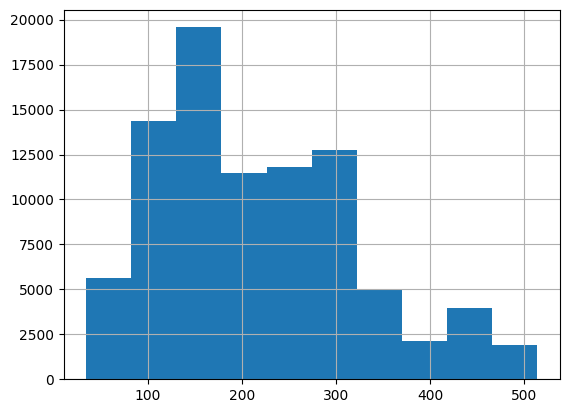

In [17]:
col = 'market_plus_dm'
xt3[col].hist()

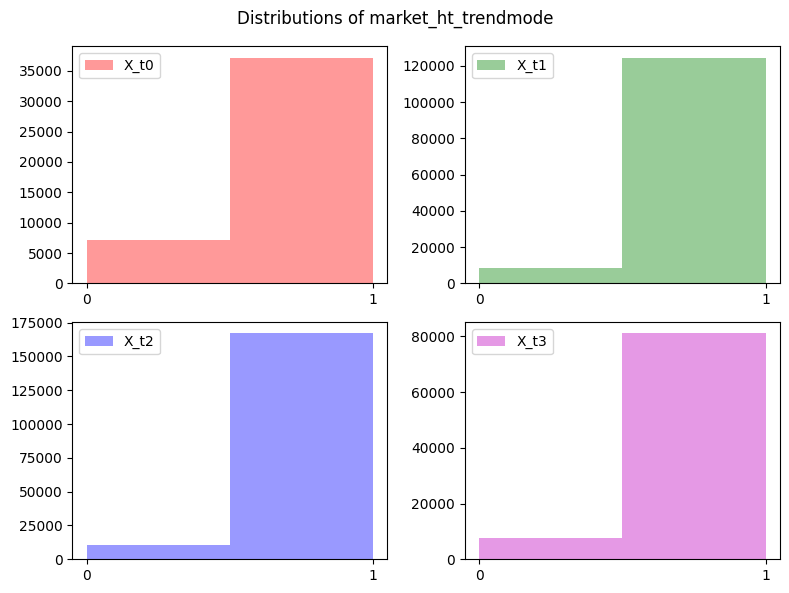

In [12]:
fig, axes = plt.subplots(2,2, figsize=(8, 6))
fig.suptitle('Distributions of market_ht_trendmode')

plt.subplot(2,2,1)
plt.hist(xt0['market_ht_trendmode'], bins=2, color='r', alpha=0.4, label='X_t0')

plt.legend()
plt.xticks(range(2), ['0', '1'])
plt.subplot(2,2,2)
plt.hist(xt1['market_ht_trendmode'], bins=2, color='g', alpha=0.4, label='X_t1')
plt.legend()

plt.xticks(range(2), ['0', '1'])
plt.subplot(2,2,3)
plt.hist(xt2['market_ht_trendmode'], bins=2, color='b', alpha=0.4, label='X_t2')
plt.legend()
plt.xticks(range(2), ['0', '1'])
plt.subplot(2,2,4)
plt.hist(xt3['market_ht_trendmode'], bins=2, color='m', alpha=0.4, label='X_t3')
plt.legend()
plt.xticks(range(2), ['0', '1'])
plt.tight_layout()
plt.savefig('dists/market_ht_trendmode_hist.png')

In [86]:
xt0_cat = xt0
xt1_cat = xt1
xt2_cat = xt2
xt3_cat = xt3

xt0_cat['has_risky_transactions'] = xt0_cat['risky_last_tx_timestamp']!=999999999
xt0_cat.loc[~xt0_cat['has_risky_transactions'], 'risky_first_tx_timestamp'] = np.nan
xt0_cat.loc[~xt0_cat['has_risky_transactions'], 'time_since_last_liquidated'] = np.nan
xt0_cat.loc[~xt0_cat['has_risky_transactions'], 'risky_last_tx_timestamp'] = np.nan

xt1_cat['has_risky_transactions'] = xt1_cat['risky_first_tx_timestamp']!=999999999 
xt1_cat.loc[~xt1_cat['has_risky_transactions'], 'risky_first_tx_timestamp'] = np.nan
xt1_cat.loc[~xt1_cat['has_risky_transactions'], 'time_since_last_liquidated'] = np.nan
xt1_cat.loc[~xt1_cat['has_risky_transactions'], 'risky_last_tx_timestamp'] = np.nan

xt2_cat['has_risky_transactions'] = xt2_cat['risky_first_tx_timestamp']!=999999999
xt2_cat.loc[~xt2_cat['has_risky_transactions'], 'risky_first_tx_timestamp'] = np.nan
xt2_cat.loc[~xt2_cat['has_risky_transactions'], 'time_since_last_liquidated'] = np.nan
xt2_cat.loc[~xt2_cat['has_risky_transactions'], 'risky_last_tx_timestamp'] = np.nan

xt3_cat['has_risky_transactions'] = xt3_cat['risky_first_tx_timestamp']!=999999999
xt3_cat.loc[~xt3_cat['has_risky_transactions'], 'risky_first_tx_timestamp'] = np.nan
xt3_cat.loc[~xt3_cat['has_risky_transactions'], 'time_since_last_liquidated'] = np.nan
xt3_cat.loc[~xt3_cat['has_risky_transactions'], 'risky_last_tx_timestamp'] = np.nan

first_0 = xt0_cat['risky_first_tx_timestamp']
last_0 = xt0_cat['risky_last_tx_timestamp']
time_0 = xt0_cat['time_since_last_liquidated']

first_1 = xt1_cat['risky_first_tx_timestamp']
last_1 = xt1_cat['risky_last_tx_timestamp']
time_1 = xt1_cat['time_since_last_liquidated']

first_2 = xt2_cat['risky_first_tx_timestamp']
last_2 = xt2_cat['risky_last_tx_timestamp']
time_2 = xt2_cat['time_since_last_liquidated']

first_3 = xt3_cat['risky_first_tx_timestamp']
last_3 = xt3_cat['risky_last_tx_timestamp']
time_3 = xt3_cat['time_since_last_liquidated']

first_0 = first_0[~np.isnan(first_0)]
last_0 = last_0[~np.isnan(last_0)]
time_0 = time_0[~np.isnan(time_0)]

first_1 = first_1[~np.isnan(first_1)]
last_1 = last_1[~np.isnan(last_1)]
time_1 = time_1[~np.isnan(time_1)]

first_2 = first_2[~np.isnan(first_2)]
last_2 = last_2[~np.isnan(last_2)]
time_2 = time_2[~np.isnan(time_2)]

first_3 = first_3[~np.isnan(first_3)]
last_3 = last_3[~np.isnan(last_3)]
time_3 = time_3[~np.isnan(time_3)]

plot_hist(
    last_0,
    last_1,
    last_2,
    last_3,
    'risky_last_tx_timestamp transformed',
    'risky_last_tx_timestamp transformed'
)

plot_hist(
    time_0,
    time_1,
    time_2,
    time_3,
    'time_since_last_liquidated transformed',
    'time_since_last_liquidated transformed'
)


In [87]:
xt0_cat['risky_last_tx_timestamp'].value_counts()

risky_last_tx_timestamp
1.592351e+09    93
1.592521e+09    44
1.592977e+09    33
1.592509e+09    30
1.592127e+09    22
                ..
1.593109e+09     1
1.593110e+09     1
1.593110e+09     1
1.593042e+09     1
1.592851e+09     1
Name: count, Length: 5682, dtype: int64